In [4]:
from statsmodels.tsa.ar_model import AutoReg
import yfinance as yf
INPUT_WINDOW_SIZE = 15
OUTPUT_WINDOW_SIZE = 1

In [5]:


yndx = yf.Ticker("yndx")
prices = yndx.history(start="2011-05-24", end="2021-12-31",
                          interval='1d').Close



In [6]:
import sys
sys.path.insert(0,'../../../..')
from Backtesting.SingleTickerBacktesting import SimplePortfolioExperiment
from source.source import prepare_data


In [7]:
X, y = prepare_data(prices, OUTPUT_WINDOW_SIZE, INPUT_WINDOW_SIZE)

In [8]:
X.shape, y.shape

((2654, 15), (2654, 1))

In [58]:
model = AutoReg(prices[:100], lags=OUTPUT_WINDOW_SIZE)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [59]:
params = model.fit().params
params

const       1.216284
Close.L1    0.955688
dtype: float64

In [69]:
pred = model.predict(params, start=0, end=500, dynamic=False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


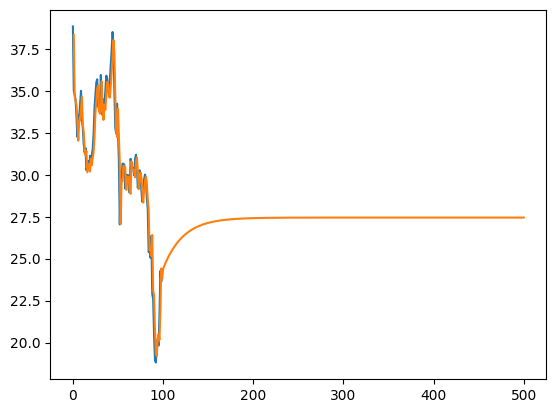

In [70]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.plot(prices.to_numpy())
ax.plot(pred)

In [66]:
pred

100    24.391723
dtype: float64

In [ ]:
SimplePortfolioExperiment()